In [ ]:
# ==== IMPORT LIBRARIES ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")


Dataset Shape: (7501, 3)

Sample Rows:
   Id             Label                                               Text
0   0  Thyroid Research  Thyroid surgery in  children in a single insti...
1   1  Thyroid Research  " The adopted strategy was the same as that us...
2   2  Thyroid Research  coronary arterybypass grafting thrombosis ï¬b...
3   3  Thyroid Research   Solitary plasmacytoma SP of the skull is an u...
4   4  Thyroid Research   This study aimed to investigate serum matrix ...

Missing values:
 Id       0
Label    0
Text     0
dtype: int64


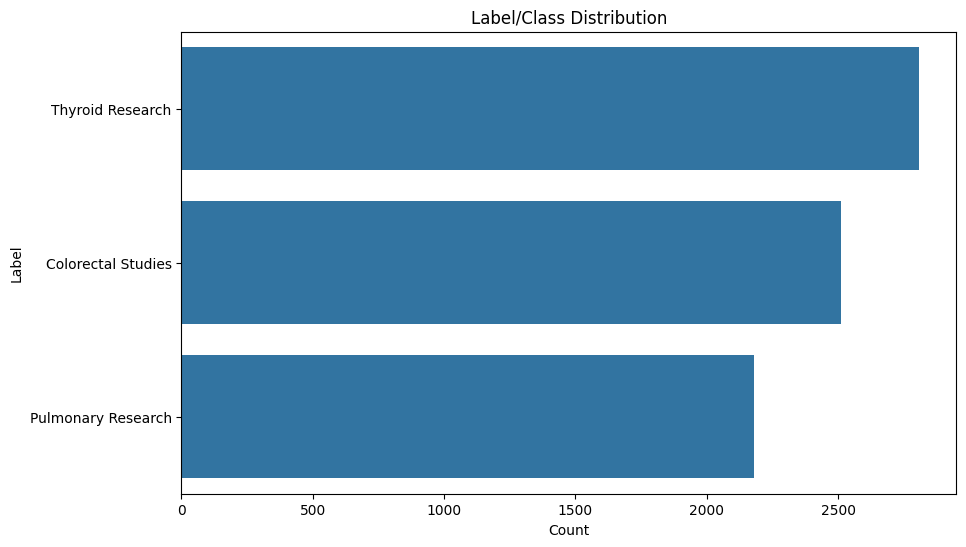

In [ ]:
# ==== LOAD DATA ====
df = pd.read_csv("/content/drive/MyDrive/Medical/Clinical Text Data.csv",encoding='ISO-8859-1')

# ==== SHOW DATA ====
print("Dataset Shape:", df.shape)
print("\nSample Rows:")
print(df.head())

# ==== CHECK FOR NULL ====
print("\nMissing values:\n", df.isnull().sum())

# ==== CLEAN TEXT ====
df['Text'] = df['Text'].astype(str).str.lower()
df['Text'] = df['Text'].str.replace(r"[^a-zA-Z\s]", " ", regex=True)

# ==== TARGET DISTRIBUTION ====
plt.figure(figsize=(10,6))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
plt.title("Label/Class Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()


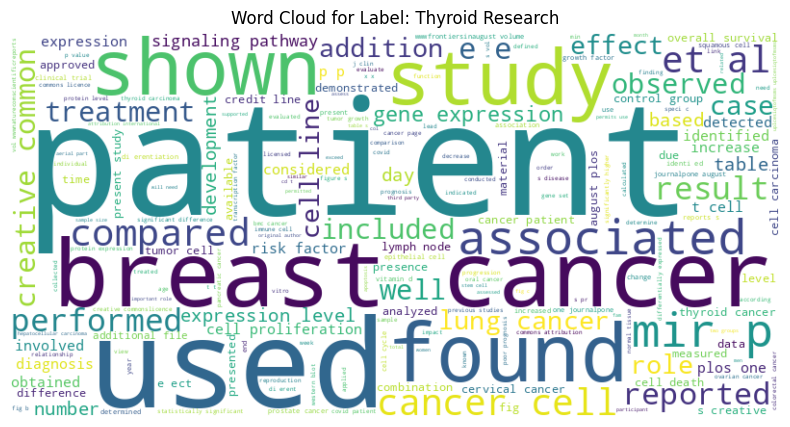

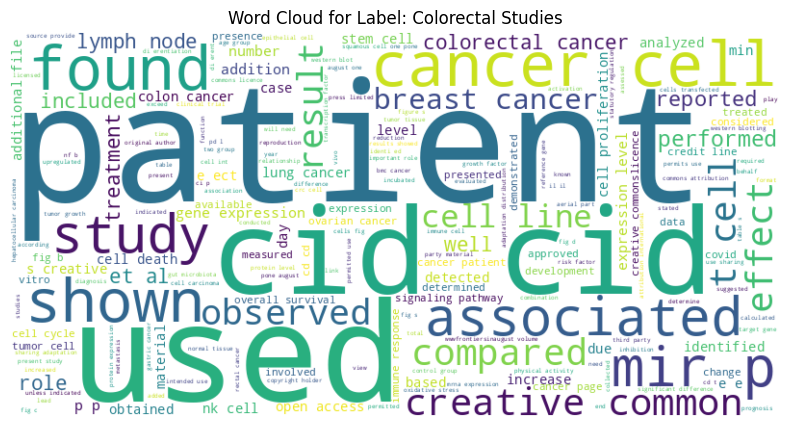

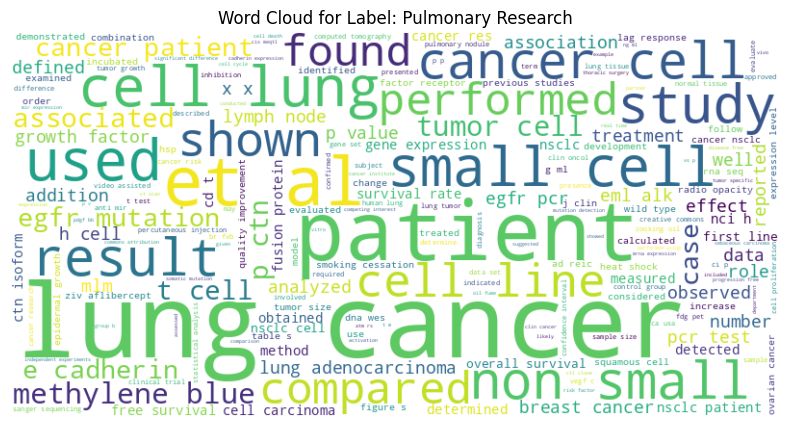

In [ ]:
top_labels = df['Label'].value_counts().nlargest(3).index

for label in top_labels:
    text = " ".join(df[df['Label'] == label]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Label: {label}")
    plt.axis('off')
    plt.show()


In [ ]:
# ==== Train/Test Split ====
X = df['Text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ==== Print Shapes ====
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# ==== Show Sample of Training and Test Data ====
print("\n--- Sample Training Data ---")
print(pd.DataFrame({'Text': X_train[:5], 'Label': y_train[:5]}))

print("\n--- Sample Test Data ---")
print(pd.DataFrame({'Text': X_test[:5], 'Label': y_test[:5]}))


Training set: 6000 samples
Test set: 1501 samples

--- Sample Training Data ---
                                                   Text               Label
7120   postmortem studies can provide important info...    Thyroid Research
787    survival curves of chimeric rb f f  trp  f f ...  Pulmonary Research
6823   the recurrence rate q is used to evaluate the...  Pulmonary Research
4718  coronavirus disease  covid   pandemic access t...    Thyroid Research
2371   lung cancer background the complement system ...  Pulmonary Research

--- Sample Test Data ---
                                                   Text               Label
7117   metastasis is a major cause of death in cance...    Thyroid Research
4971   ammatory bowel disease ibd is a chronic immun...  Colorectal Studies
1588   cowden s syndrome is an autosomal dominant di...    Thyroid Research
7363     while the impact of family caregiving has b...  Colorectal Studies
3731   pax  expression was obviously weakened in a  ...  P

In [ ]:
model_results = {}  # Store accuracy of each model

def evaluate_model(name, model):
    global model_results

    print(f"\n================ {name} ================\n")

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Accuracy & Report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    model_results[name] = acc  # Save accuracy

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(xticks_rotation=90, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



================ Multinomial Naive Bayes ================

Accuracy: 0.9274
Classification Report:
                     precision    recall  f1-score   support

Colorectal Studies       0.93      0.86      0.90       503
Pulmonary Research       1.00      0.98      0.99       436
  Thyroid Research       0.88      0.94      0.91       562

          accuracy                           0.93      1501
         macro avg       0.93      0.93      0.93      1501
      weighted avg       0.93      0.93      0.93      1501



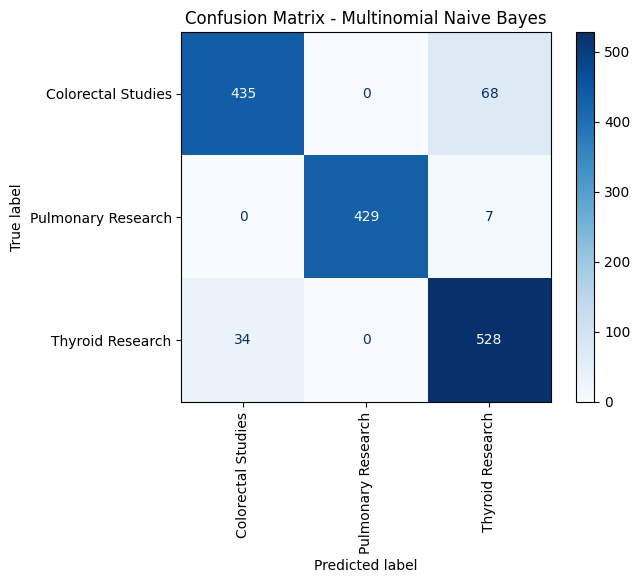

In [ ]:
# Naive Bayes
evaluate_model("Multinomial Naive Bayes", MultinomialNB())




================ Logistic Regression ================

Accuracy: 0.9460
Classification Report:
                     precision    recall  f1-score   support

Colorectal Studies       0.92      0.91      0.92       503
Pulmonary Research       1.00      1.00      1.00       436
  Thyroid Research       0.92      0.93      0.93       562

          accuracy                           0.95      1501
         macro avg       0.95      0.95      0.95      1501
      weighted avg       0.95      0.95      0.95      1501



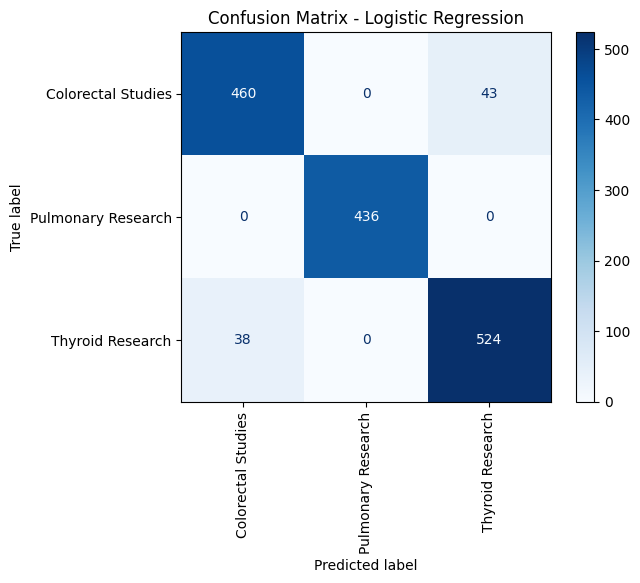

In [ ]:
# Logistic Regression
evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000))



================ Linear SVM ================

Accuracy: 0.9674
Classification Report:
                     precision    recall  f1-score   support

Colorectal Studies       0.94      0.97      0.95       503
Pulmonary Research       1.00      1.00      1.00       436
  Thyroid Research       0.97      0.94      0.96       562

          accuracy                           0.97      1501
         macro avg       0.97      0.97      0.97      1501
      weighted avg       0.97      0.97      0.97      1501



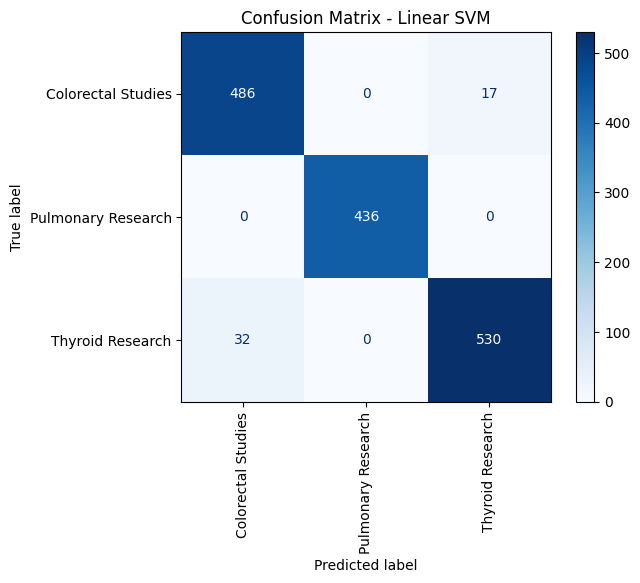

In [ ]:

# Support Vector Machine
evaluate_model("Linear SVM", LinearSVC())


================ Random Forest ================

Accuracy: 0.9907
Classification Report:
                     precision    recall  f1-score   support

Colorectal Studies       0.99      0.99      0.99       503
Pulmonary Research       0.99      1.00      1.00       436
  Thyroid Research       0.99      0.99      0.99       562

          accuracy                           0.99      1501
         macro avg       0.99      0.99      0.99      1501
      weighted avg       0.99      0.99      0.99      1501



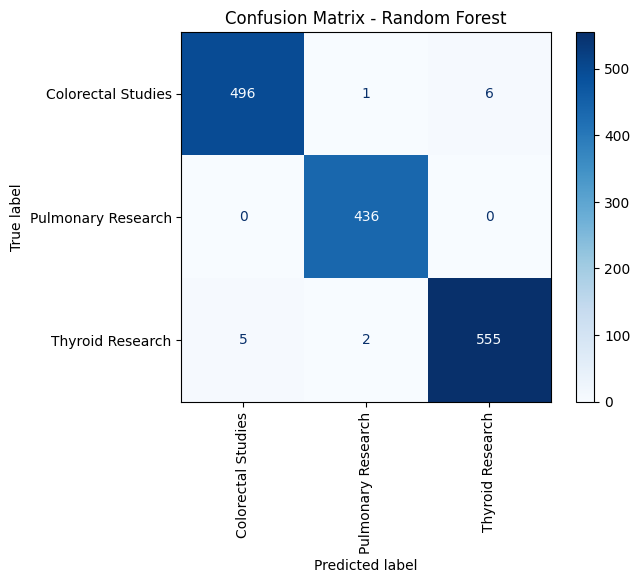

In [ ]:
evaluate_model(
    "Random Forest",
    RandomForestClassifier(
        n_estimators=100,
        max_depth=10,               # controls tree depth
        min_samples_split=10,       # must have at least 10 to split
        min_samples_leaf=5,         # each leaf must have at least 5
        random_state=42
    )
)


In [ ]:
import joblib

In [ ]:
# === SAVE BEST MODEL (example: Logistic Regression) ===
final_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])
final_model.fit(X, y)
joblib.dump(final_model, "text_classifier.pkl")
print("\n✅ Model saved as 'text_classifier.pkl'")


✅ Model saved as 'text_classifier.pkl'


In [ ]:
def predict_text_class(text):
    model = joblib.load("text_classifier.pkl")
    prediction = model.predict([text])[0]
    print(f"🔮 Predicted Class: {prediction}")


In [ ]:
sample_text = "Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud "
predict_text_class(sample_text)

🔮 Predicted Class: Thyroid Research


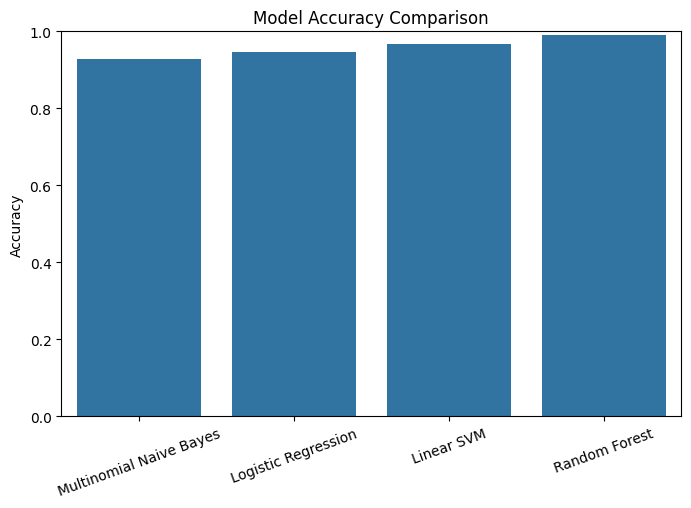

In [ ]:
# ==== Accuracy Bar Chart ====
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))
plt.ylim(0, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()
